Part 3: Visualization

How do I use pandas to plot?


Pandas has a .plot which you configure using its arguments (eg., kind=hist), this however just uses seaborn.

In [50]:
import pandas as pd
ti = pd.read_csv('tips.csv')
ti.head(3) 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


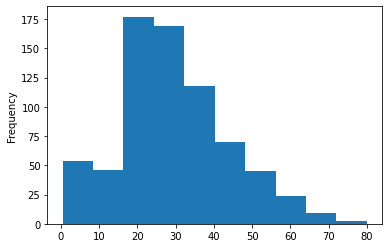

In [14]:
ti['age'].plot(kind='hist');

Often pandas doesn't choose the right plot, or the right dataseries... therefore it's often easier to go straight to using seaborn

How do I use seaborn to visualize data?

In [15]:
import seaborn as sns

Checks for emptiness and cleanse **data**

In [16]:
ti.isna().sum() #check for emptiness

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [24]:
#replace NaNs in numerical fields with the mean values
ti=ti.fillna(ti.mean()) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [25]:
# fill every column with its own most frequent value 
ti = ti.apply(lambda x:x.fillna(x.value_counts().index[0])) 

In [26]:
ti

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


There are two ways of using seaborn, you can either

supply x (, y, etc.) as individual arguments
OR: supply a dataframe and name the relevant columns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


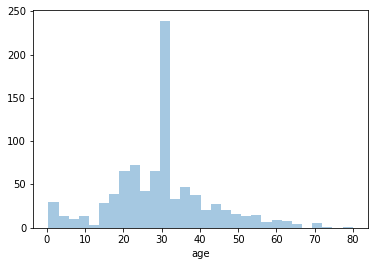

In [27]:
sns.distplot(ti['age'], kde=False);

What is the kde?
approximation of the distribution using a linear combination of normal distributions



further reading: https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


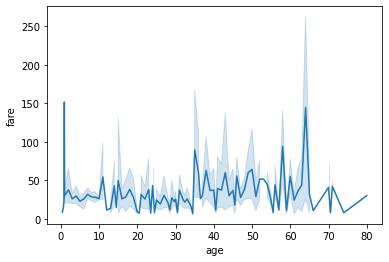

In [28]:
sns.lineplot(ti['age'], ti['fare'])

How do I use a dataframe with seaborn?

We set data to be the dataframe, and name the columns for x and y...

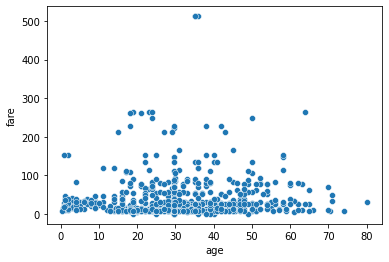

In [29]:
sns.scatterplot(data=ti, x='age', y='fare')

How do I create a distribution plot?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


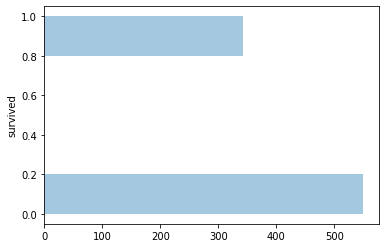

In [30]:
sns.distplot(ti['survived'], vertical=True, kde=False)

How do I create a violin plot?


The width of a violin plot is the frequency (ie., how common) a value is within some column...

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


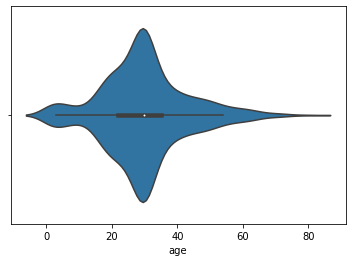

In [31]:
sns.violinplot(ti['age'])

How do I create a box plot?
Box plots show quarties (25th, 50th, 75th) and outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


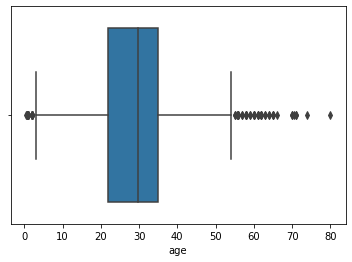

In [32]:
sns.boxplot(ti['age'])

How do I create a violin plot for multiple columns?

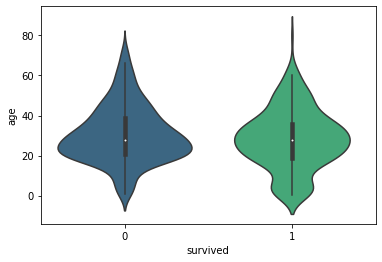

In [93]:
sns.violinplot(data=ti , x='survived', y='age', palette='viridis')

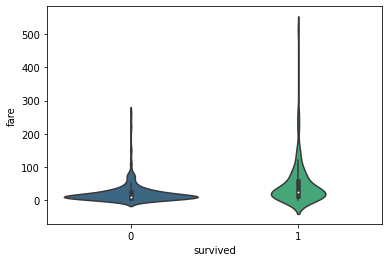

In [94]:
sns.violinplot(data=ti , x='survived', y='fare', palette='viridis')

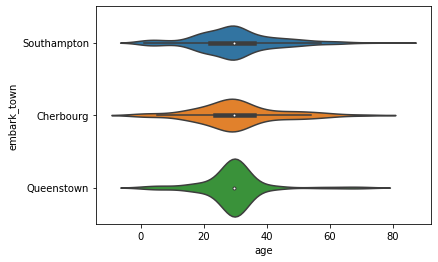

In [34]:
sns.violinplot(data=ti , x='age' ,y= 'embark_town')

How do I create a bar plor for multiple columns?

Bar plots are useful for discrete data or for showing, here, the means

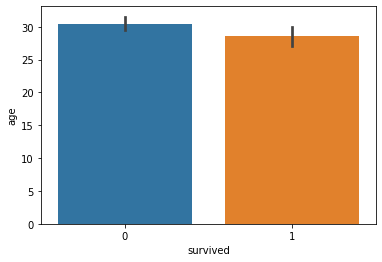

In [36]:
sns.barplot(data=ti, x='survived',y='age');

How do I create a line plot?

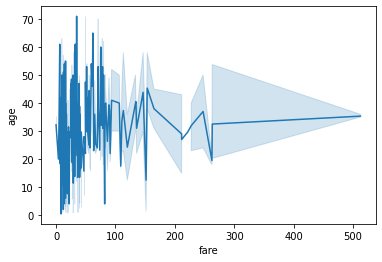

In [37]:
sns.lineplot(data=ti, x='fare', y='age')

NB: would creating a scatter plot be more appropriate?

How do I create a scatter plot?

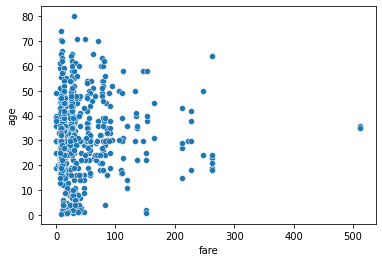

In [38]:
sns.scatterplot(data=ti, x='fare', y='age');

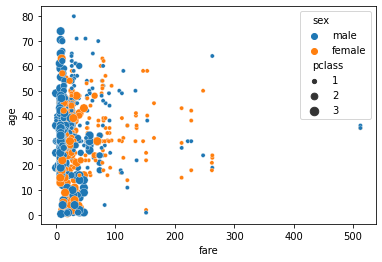

In [39]:
sns.scatterplot(data=ti, x='fare', y='age', 
                hue = 'sex', 
                size = 'pclass');

EXERCISE 

step 1

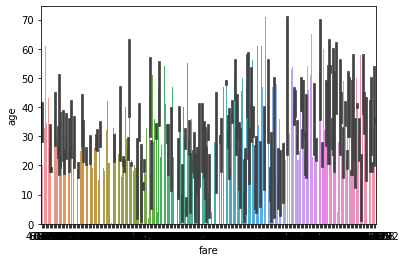

In [58]:
sns.barplot(data=ti, x='fare',y='age');

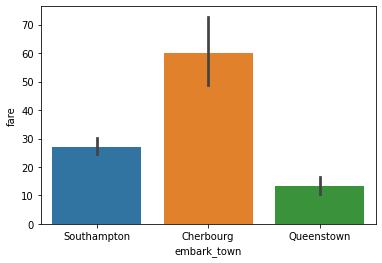

In [76]:
sns.barplot(data=ti, x='embark_town',y='fare');

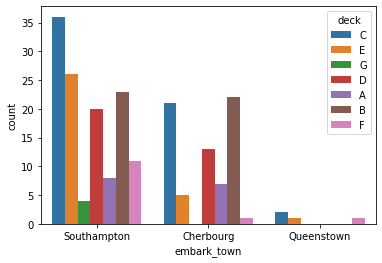

In [92]:
sns.countplot(data=ti, x='embark_town', hue='deck');

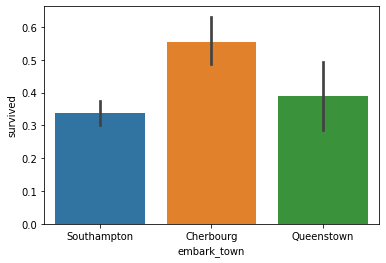

In [75]:
sns.barplot(data=ti, x='embark_town',y='survived');# people from embark_town will survived more than other two

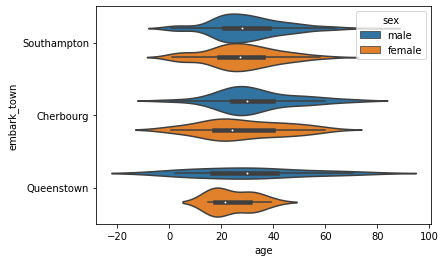

In [68]:
sns.violinplot(data=ti , x='age' ,y= 'embark_town', hue='sex')

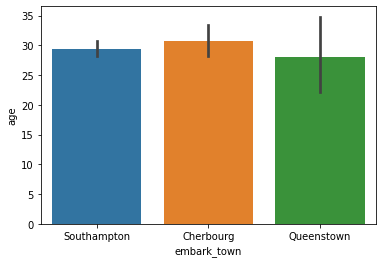

In [77]:
sns.barplot(data=ti, x='embark_town',y='age'); 

STEP 2

What affected your chances of survival on the titanic?
brainstorm & execute an analysis of the titanic dataset

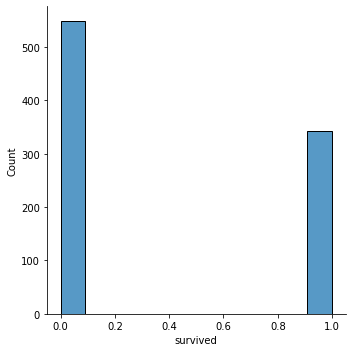

In [90]:
sns.displot(ti['survived'], kde=False) # number of men survived>number of women

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


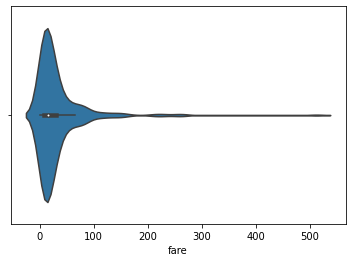

In [78]:
sns.violinplot(ti['fare'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


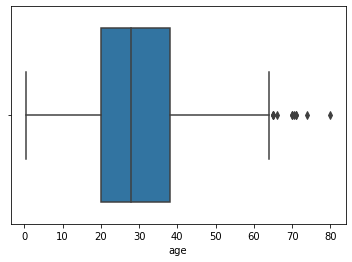

In [79]:
sns.boxplot(ti['age'])

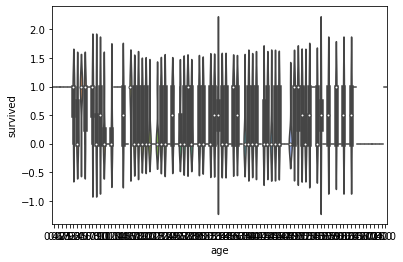

In [83]:
sns.violinplot(data=ti,x='age',y='survived')

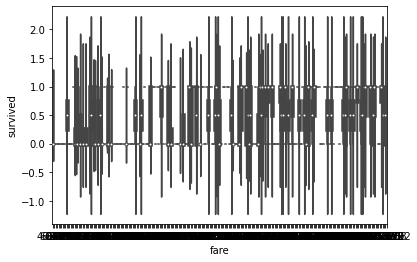

In [84]:
sns.violinplot(data=ti,x='fare',y='survived')

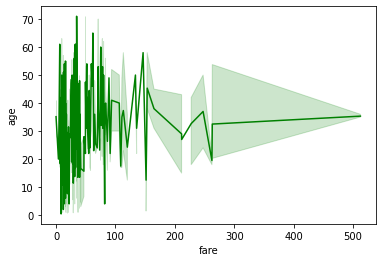

In [88]:
sns.lineplot(data=ti,x='fare',y='age', color='green')

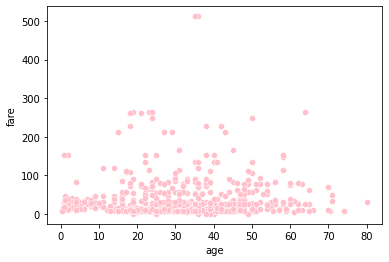

In [89]:
sns.scatterplot(data=ti,x='age',y='fare', color='pink')

In [87]:
ti[["age","sex"]].groupby(ti.age>18).sum()

,age
age,
False,1489.67
True,19715.50
